In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [151]:
df=pd.read_csv("Mall_Customers - Mall_Customers.csv")

In [152]:
df.shape

(200, 5)

In [153]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [154]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [156]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [157]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [158]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [159]:
df.isnull().sum().sort_values(ascending=False)

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [160]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['Genre']

In [161]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [162]:
# renaming the column
if 'Genre' in df.columns and 'Gender' not in df.columns:
    df = df.rename(columns={'Genre': 'Gender'})

In [163]:
# featuere engineering and selection
x=df.iloc[:,[3,4]]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [164]:
# scaling the input feature data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled[:5]

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918]])

In [165]:
x = pd.DataFrame(x_scaled, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
x.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


In [166]:
# finding the optimal value of k
from sklearn.cluster import KMeans
wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss

[23.04072032603991,
 14.085982559040602,
 9.059792751166924,
 6.1218566188503605,
 3.58516691306247,
 3.223307016899876,
 2.909542176792418,
 2.4699952223283113,
 2.287401904321795,
 1.8670022115349205]

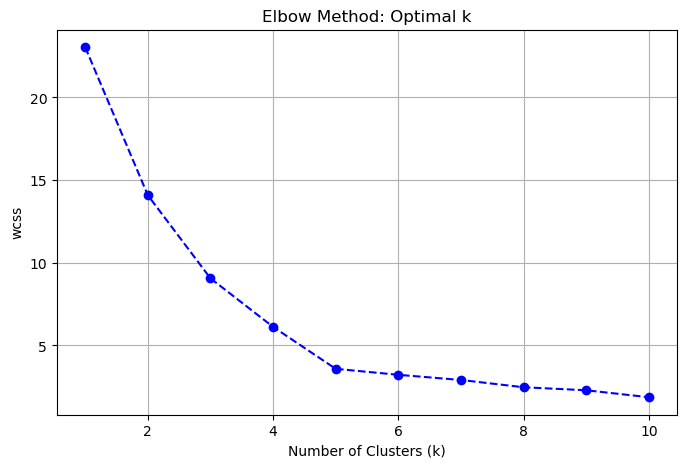

In [167]:
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method: Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('wcss')
plt.grid(True)
plt.show()

In [168]:
k_optimal = 5 

In [169]:
#Fit final KMeans using the chosen k
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)

In [170]:
#Add the cluster labels to the data
x['Cluster'] = y_kmeans
x.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,0.000000,0.387755,4
1,0.000000,0.816327,2
2,0.008197,0.051020,4
3,0.008197,0.775510,2
4,0.016393,0.397959,4


In [171]:
print(x.columns)


Index(['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster'], dtype='object')


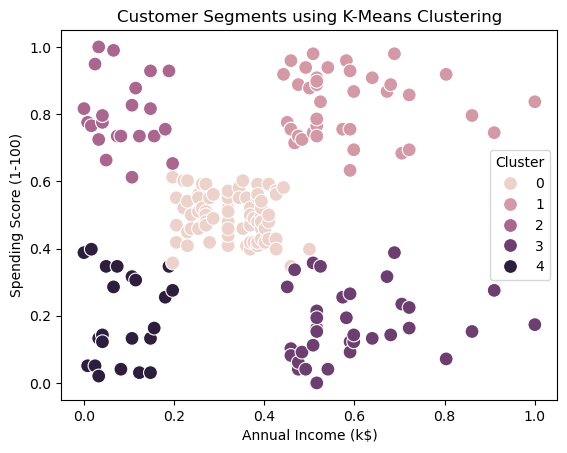

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=x,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Cluster',s=100)
plt.title('Customer Segments using K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


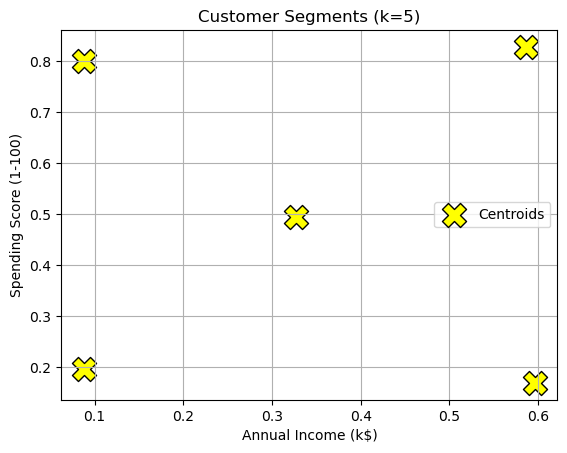

In [173]:
#Plot centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300, c='yellow', marker='X', edgecolors='black', label='Centroids'
)
plt.title(f'Customer Segments (k={k_optimal})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [174]:
# Example: new customer data
new_customer = np.array([[70, 80]])
new_customer_scaled = scaler.transform(new_customer)
cluster_label = kmeans.predict(new_customer_scaled)
print(f"The new customer belongs to cluster: {cluster_label[0]}")


The new customer belongs to cluster: 1
